In [1]:
#MLP NN (Multi Layer Perceptron)

In [3]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/Users/ag/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
#view data / explore
SPY = yf.Ticker("^GSPC")
SPY_data = SPY.history(period="10y", interval="1d") #use 10 years of train data and 1 year of test

print(SPY_data.head())

                                  Open         High          Low        Close  \
Date                                                                            
2015-04-27 00:00:00-04:00  2119.290039  2125.919922  2107.040039  2108.919922   
2015-04-28 00:00:00-04:00  2108.350098  2116.040039  2094.889893  2114.760010   
2015-04-29 00:00:00-04:00  2112.489990  2113.649902  2097.409912  2106.850098   
2015-04-30 00:00:00-04:00  2105.520020  2105.520020  2077.590088  2085.510010   
2015-05-01 00:00:00-04:00  2087.379883  2108.409912  2087.379883  2108.290039   

                               Volume  Dividends  Stock Splits  
Date                                                            
2015-04-27 00:00:00-04:00  3438750000        0.0           0.0  
2015-04-28 00:00:00-04:00  3546270000        0.0           0.0  
2015-04-29 00:00:00-04:00  4074970000        0.0           0.0  
2015-04-30 00:00:00-04:00  4509680000        0.0           0.0  
2015-05-01 00:00:00-04:00  3379390000     

In [5]:
dow = yf.Ticker("^DJI")
dow_data = dow.history(period="10y", interval="1d")

print(dow_data.head())

                                   Open          High           Low  \
Date                                                                  
2015-04-27 00:00:00-04:00  18097.890625  18175.560547  18024.660156   
2015-04-28 00:00:00-04:00  18035.900391  18119.650391  17917.359375   
2015-04-29 00:00:00-04:00  18093.689453  18096.460938  17953.689453   
2015-04-30 00:00:00-04:00  18033.330078  18033.330078  17774.890625   
2015-05-01 00:00:00-04:00  17859.269531  18028.890625  17859.269531   

                                  Close     Volume  Dividends  Stock Splits  
Date                                                                         
2015-04-27 00:00:00-04:00  18037.970703  121110000        0.0           0.0  
2015-04-28 00:00:00-04:00  18110.140625  124930000        0.0           0.0  
2015-04-29 00:00:00-04:00  18035.529297  102080000        0.0           0.0  
2015-04-30 00:00:00-04:00  17840.519531  129180000        0.0           0.0  
2015-05-01 00:00:00-04:00  18024.0

In [6]:
nasdaq = yf.Ticker("^IXIC")
nasdaq_data = nasdaq.history(period="10y", interval="1d")

print(nasdaq_data.head())

                                  Open         High          Low        Close  \
Date                                                                            
2015-04-27 00:00:00-04:00  5104.359863  5119.830078  5053.540039  5060.250000   
2015-04-28 00:00:00-04:00  5063.259766  5075.299805  5006.279785  5055.419922   
2015-04-29 00:00:00-04:00  5028.450195  5053.839844  4999.830078  5023.640137   
2015-04-30 00:00:00-04:00  4996.990234  5015.959961  4921.549805  4941.419922   
2015-05-01 00:00:00-04:00  4966.319824  5005.390137  4962.740234  5005.390137   

                               Volume  Dividends  Stock Splits  
Date                                                            
2015-04-27 00:00:00-04:00  2172470000        0.0           0.0  
2015-04-28 00:00:00-04:00  2032500000        0.0           0.0  
2015-04-29 00:00:00-04:00  1871300000        0.0           0.0  
2015-04-30 00:00:00-04:00  2269290000        0.0           0.0  
2015-05-01 00:00:00-04:00  1854400000     

In [7]:
def preprocessing(df, column = 'Close', sequence_length = 30, test_size = 0.1): #sequence length is # of days in window
    df = df.copy()
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[[column]])
    
    X,y = [],[]
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i, 0])
        y.append(scaled_data[i, 0])

    X,y = np.array(X), np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    return X_train, X_test, y_train, y_test, scaler


In [7]:
X_train_spy, X_test_spy, y_train_spy, y_test_spy, scaler_spy = preprocessing(SPY_data)
X_train_dow, X_test_dow, y_train_dow, y_test_dow, scaler_dow = preprocessing(dow_data)
X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, scaler_nasdaq = preprocessing(nasdaq_data)

In [8]:
def run_mlp(X_train, X_test, y_train, y_test, scaler, label='', epochs=50, batch_size=32):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

    y_pred = model.predict(X_test)
    y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
    mae = mean_absolute_error(y_test_actual, y_pred_actual)
    r2 = r2_score(y_test_actual, y_pred_actual)

    print(f"MLP Metrics ({label}):")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return model, y_pred_actual, y_test_actual, {'rmse': rmse, 'mae': mae, 'r2': r2}

In [9]:
mlp_model_spy, mlp_pred_spy, y_test_spy_actual, mlp_metrics_spy = run_mlp(
    X_train_spy, X_test_spy, y_train_spy, y_test_spy, scaler_spy, label="S&P 500"
)


mlp_model_dow, mlp_pred_dow, y_test_dow_actual, mlp_metrics_dow = run_mlp(
    X_train_dow, X_test_dow, y_train_dow, y_test_dow, scaler_dow, label="Dow Jones"
)

mlp_model_nasdaq, mlp_pred_nasdaq, y_test_nasdaq_actual, mlp_metrics_nasdaq = run_mlp(
    X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, scaler_nasdaq, label="NASDAQ"
)


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (S&P 500):
RMSE: 70.1428
MAE:  48.6806
R² Score: 0.9434


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (Dow Jones):
RMSE: 494.9804
MAE:  350.9304
R² Score: 0.9397


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (NASDAQ):
RMSE: 306.5431
MAE:  232.0339
R² Score: 0.9330


In [10]:
def plot_predictions(y_actual, y_pred, title='Model Predictions vs Actual'):
    plt.figure(figsize=(12, 6))
    plt.plot(y_actual, label='Actual Prices', linewidth=2)
    plt.plot(y_pred, label='Predicted Prices', linestyle='--')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [11]:
def plot_full_with_predictions(full_data, column, y_test_actual, y_pred, title='Index Forecast (10-Year Overview)', test_size=0.1):
    import matplotlib.pyplot as plt
    import numpy as np

    full_series = full_data[column].values
    total_len = len(full_series)
    test_len = len(y_test_actual)
    train_len = total_len - test_len

    timeline = full_data.index
    full_range = np.arange(total_len)
    test_range = np.arange(train_len, total_len)

    plt.figure(figsize=(14, 6))
    plt.plot(timeline, full_series, label='Full Historical Data', linewidth=2)
    plt.plot(timeline[test_range], y_test_actual.flatten(), label='Actual Test Data', color='green', linewidth=2)
    plt.plot(timeline[test_range], y_pred.flatten(), label='Predicted Data', linestyle='--', color='red', linewidth=2)

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Index Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

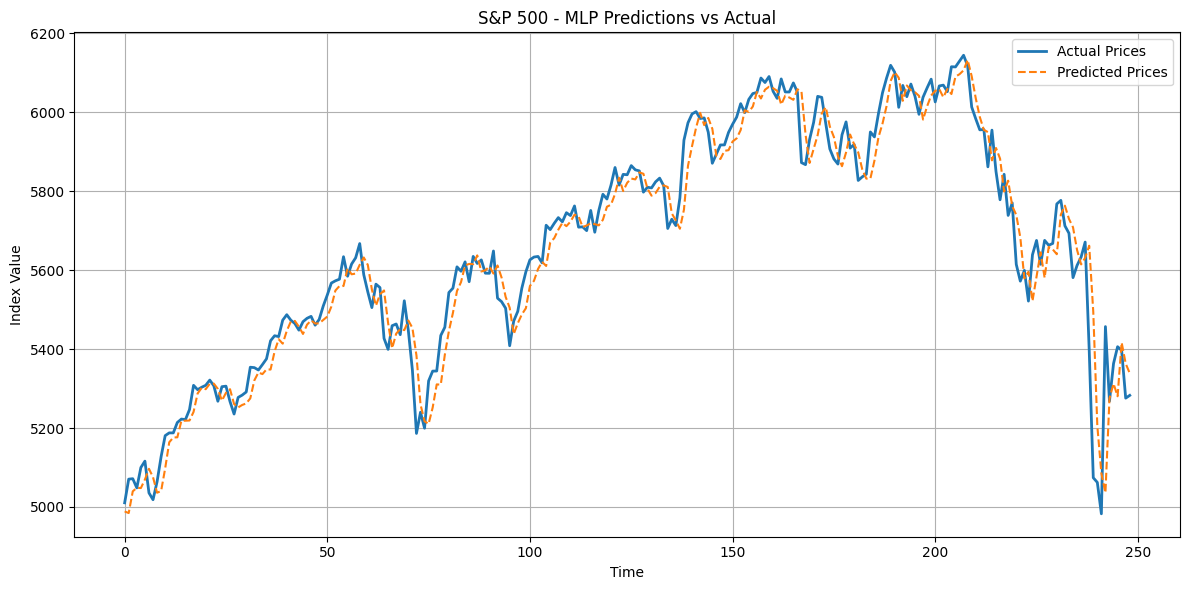

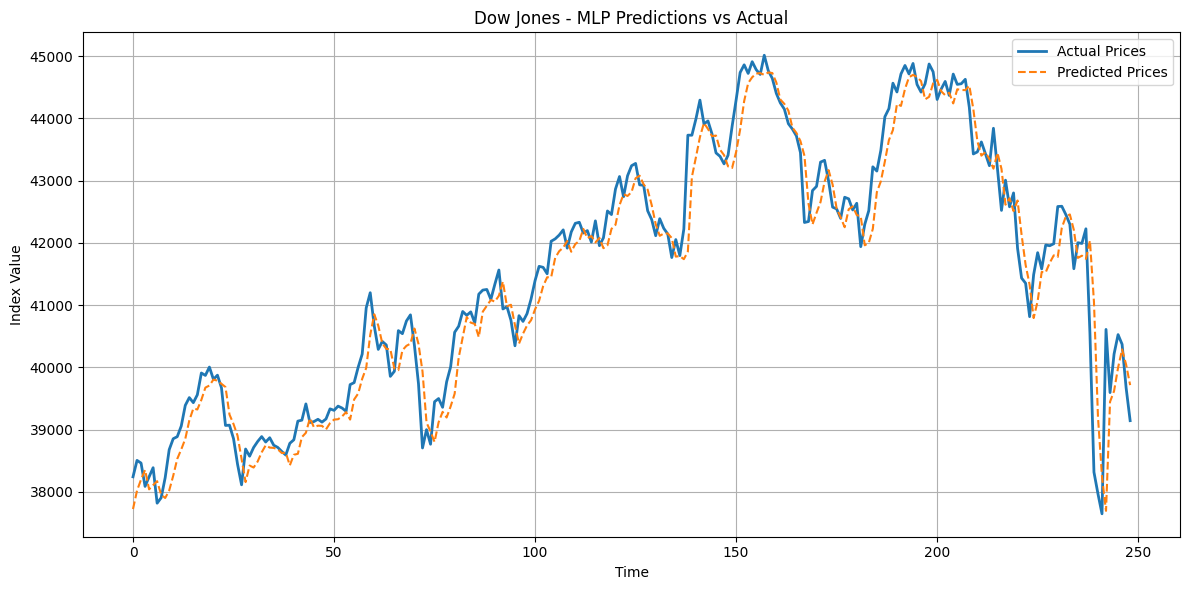

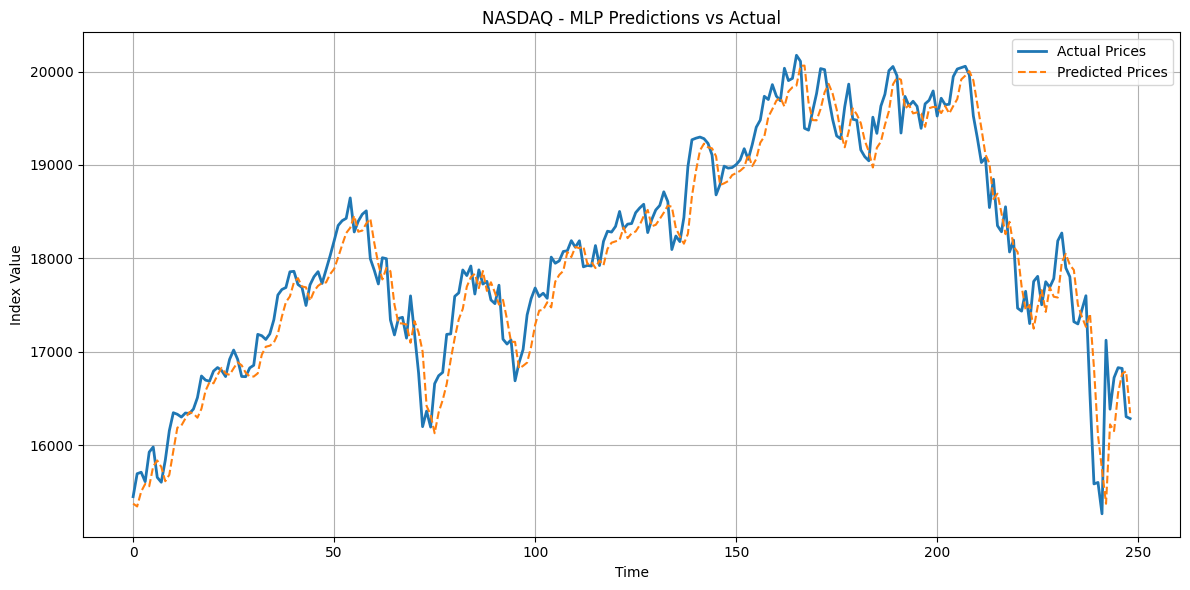

In [12]:
plot_predictions(y_test_spy_actual, mlp_pred_spy, title="S&P 500 - MLP Predictions vs Actual")
plot_predictions(y_test_dow_actual, mlp_pred_dow, title="Dow Jones - MLP Predictions vs Actual")
plot_predictions(y_test_nasdaq_actual, mlp_pred_nasdaq, title="NASDAQ - MLP Predictions vs Actual")


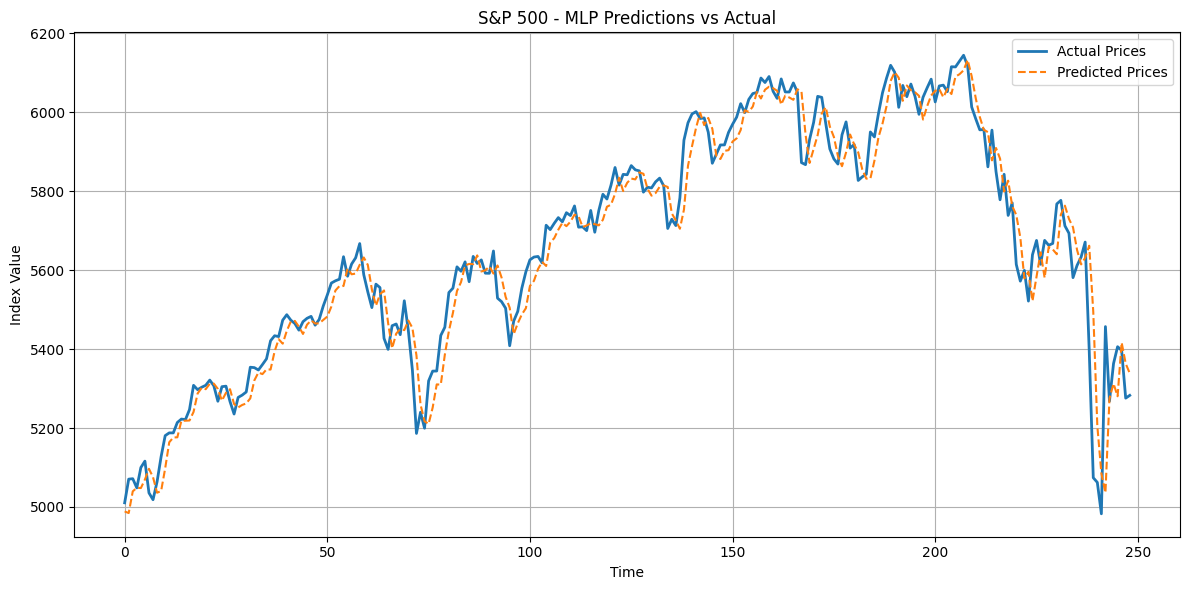

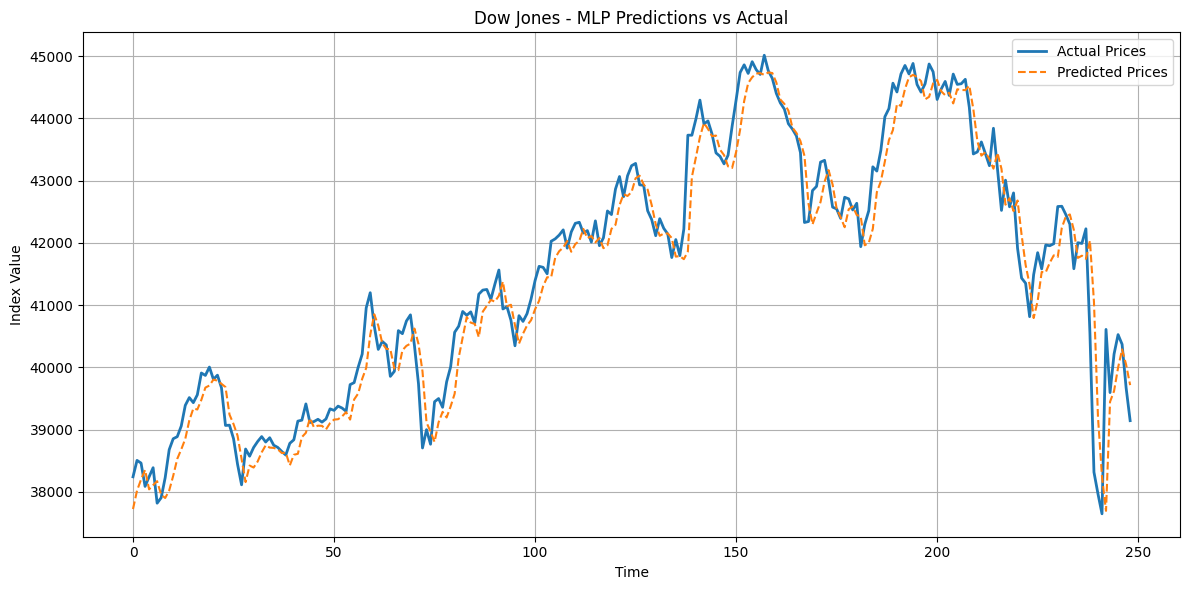

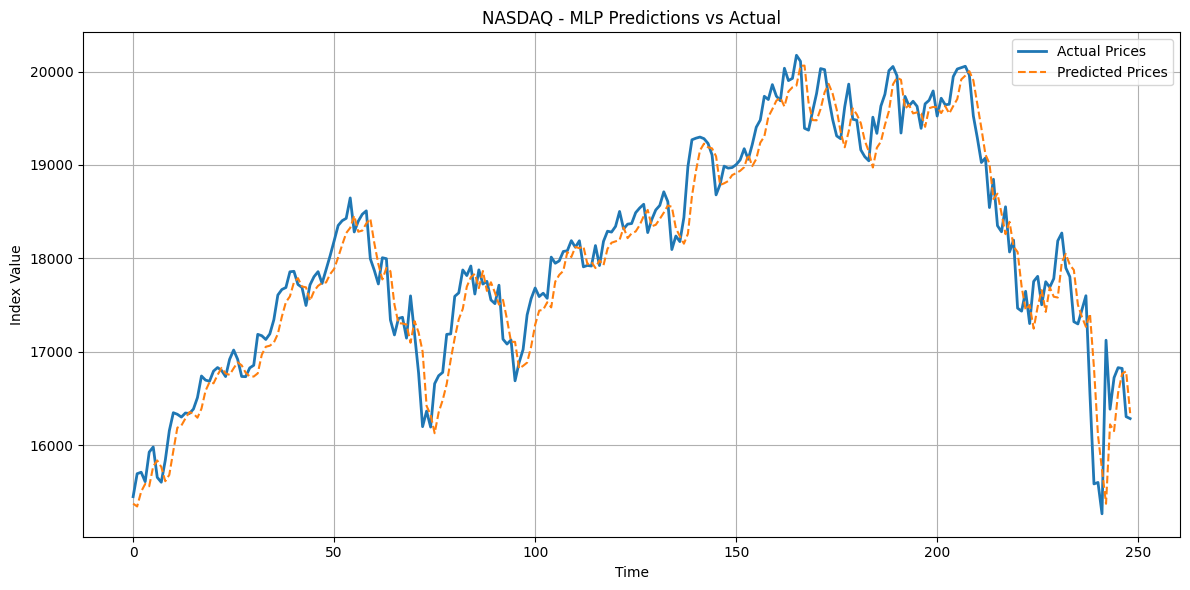

In [13]:
plot_predictions(y_test_spy_actual, mlp_pred_spy, title="S&P 500 - MLP Predictions vs Actual")
plot_predictions(y_test_dow_actual, mlp_pred_dow, title="Dow Jones - MLP Predictions vs Actual")
plot_predictions(y_test_nasdaq_actual, mlp_pred_nasdaq, title="NASDAQ - MLP Predictions vs Actual")


In [14]:
mlp_metrics_df = pd.DataFrame({
    'S&P 500': {
        'MLP_RMSE': mlp_metrics_spy['rmse'],
        'MLP_MAE': mlp_metrics_spy['mae'],
        'MLP_R2': mlp_metrics_spy['r2'],
    },
    'Dow Jones': {
        'MLP_RMSE': mlp_metrics_dow['rmse'],
        'MLP_MAE': mlp_metrics_dow['mae'],
        'MLP_R2': mlp_metrics_dow['r2'],
    },
    'NASDAQ': {
        'MLP_RMSE': mlp_metrics_nasdaq['rmse'],
        'MLP_MAE': mlp_metrics_nasdaq['mae'],
        'MLP_R2': mlp_metrics_nasdaq['r2'],
    }
}).T.round(4)


In [15]:
epoch_settings = [20, 50, 75, 100, 150, 200, 250, 300]


In [16]:
mlp_results_spy = []

for epochs in epoch_settings:
    _, _, _, metrics = run_mlp(X_train_spy, X_test_spy, y_train_spy, y_test_spy, scaler_spy, label=f"S&P 500 - {epochs} Epochs", epochs=epochs)
    mlp_results_spy.append({
        'Epochs': epochs,
        'RMSE': metrics['rmse'],
        'MAE': metrics['mae'],
        'R2': metrics['r2']
    })

mlp_df_spy = pd.DataFrame(mlp_results_spy).sort_values('Epochs').reset_index(drop=True)


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (S&P 500 - 20 Epochs):
RMSE: 104.4295
MAE:  89.2750
R² Score: 0.8746


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (S&P 500 - 50 Epochs):
RMSE: 78.8680
MAE:  60.6605
R² Score: 0.9285


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (S&P 500 - 75 Epochs):
RMSE: 82.1514
MAE:  65.2993
R² Score: 0.9224


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (S&P 500 - 100 Epochs):
RMSE: 77.6139
MAE:  50.4196
R² Score: 0.9307


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (S&P 500 - 150 Epochs):
RMSE: 72.2111
MAE:  46.0859
R² Score: 0.9400


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (S&P 500 - 200 Epochs):
RMSE: 80.7992
MAE:  56.5576
R² Score: 0.9249


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (S&P 500 - 250 Epochs):
RMSE: 71.2997
MAE:  45.7657
R² Score: 0.9415


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (S&P 500 - 300 Epochs):
RMSE: 83.3796
MAE:  67.8111
R² Score: 0.9200


In [17]:
mlp_results_dow = []

for epochs in epoch_settings:
    _, _, _, metrics = run_mlp(X_train_dow, X_test_dow, y_train_dow, y_test_dow, scaler_dow, label=f"Dow Jones - {epochs} Epochs", epochs=epochs)
    mlp_results_dow.append({
        'Epochs': epochs,
        'RMSE': metrics['rmse'],
        'MAE': metrics['mae'],
        'R2': metrics['r2']
    })

mlp_df_dow = pd.DataFrame(mlp_results_dow).sort_values('Epochs').reset_index(drop=True)


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (Dow Jones - 20 Epochs):
RMSE: 602.2356
MAE:  448.7718
R² Score: 0.9108


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (Dow Jones - 50 Epochs):
RMSE: 694.6734
MAE:  538.7596
R² Score: 0.8813


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (Dow Jones - 75 Epochs):
RMSE: 471.0734
MAE:  312.6317
R² Score: 0.9454


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (Dow Jones - 100 Epochs):
RMSE: 529.5101
MAE:  371.1675
R² Score: 0.9310


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (Dow Jones - 150 Epochs):
RMSE: 453.8298
MAE:  308.2671
R² Score: 0.9493


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MLP Metrics (Dow Jones - 200 Epochs):
RMSE: 459.9576
MAE:  304.7698
R² Score: 0.9480


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (Dow Jones - 250 Epochs):
RMSE: 490.9505
MAE:  354.6166
R² Score: 0.9407


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (Dow Jones - 300 Epochs):
RMSE: 547.2439
MAE:  396.2037
R² Score: 0.9263


In [18]:
mlp_results_nasdaq = []

for epochs in epoch_settings:
    _, _, _, metrics = run_mlp(X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, scaler_nasdaq, label=f"NASDAQ - {epochs} Epochs", epochs=epochs)
    mlp_results_nasdaq.append({
        'Epochs': epochs,
        'RMSE': metrics['rmse'],
        'MAE': metrics['mae'],
        'R2': metrics['r2']
    })

mlp_df_nasdaq = pd.DataFrame(mlp_results_nasdaq).sort_values('Epochs').reset_index(drop=True)


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (NASDAQ - 20 Epochs):
RMSE: 333.5834
MAE:  246.6420
R² Score: 0.9207


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (NASDAQ - 50 Epochs):
RMSE: 474.6910
MAE:  379.3708
R² Score: 0.8394


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (NASDAQ - 75 Epochs):
RMSE: 321.9145
MAE:  255.8918
R² Score: 0.9262


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (NASDAQ - 100 Epochs):
RMSE: 543.8921
MAE:  486.5487
R² Score: 0.7892


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (NASDAQ - 150 Epochs):
RMSE: 357.3022
MAE:  292.9790
R² Score: 0.9090


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (NASDAQ - 200 Epochs):
RMSE: 355.1605
MAE:  259.8883
R² Score: 0.9101


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (NASDAQ - 250 Epochs):
RMSE: 291.2883
MAE:  198.8182
R² Score: 0.9395


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (NASDAQ - 300 Epochs):
RMSE: 383.5723
MAE:  320.4159
R² Score: 0.8952


In [19]:
mlp_df_spy.style.set_caption("MLP Model Performance Across Epochs - S&P 500")


,Epochs,RMSE,MAE,R2
0,20,104.429458,89.275044,0.874586
1,50,78.867978,60.660523,0.928468
2,75,82.151427,65.299320,0.922388
3,100,77.613862,50.419612,0.930725
4,150,72.211085,46.085936,0.940034
5,200,80.799156,56.557611,0.924922
6,250,71.299709,45.765703,0.941538
7,300,83.379572,67.811104,0.920050


In [20]:
mlp_df_dow.style.set_caption("MLP Model Performance Across Epochs - Dow Jones")


,Epochs,RMSE,MAE,R2
0,20,602.235560,448.771806,0.910779
1,50,694.673417,538.759617,0.881288
2,75,471.073435,312.631730,0.945410
3,100,529.510136,371.167545,0.931027
4,150,453.829765,308.267100,0.949334
5,200,459.957597,304.769751,0.947956
6,250,490.950509,354.616591,0.940706
7,300,547.243930,396.203737,0.926329


In [21]:
mlp_df_nasdaq.style.set_caption("MLP Model Performance Across Epochs - NASDAQ")


,Epochs,RMSE,MAE,R2
0,20,333.583409,246.641951,0.920700
1,50,474.690978,379.370847,0.839422
2,75,321.914451,255.891762,0.926151
3,100,543.892096,486.548734,0.789190
4,150,357.302159,292.979002,0.909022
5,200,355.160503,259.888295,0.910109
6,250,291.288268,198.818163,0.939534
7,300,383.572329,320.415878,0.895152


In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

def run_mlp_comparison(X_train_dict, X_test_dict, y_train_dict, y_test_dict, scaler_dict, indexes, epochs=200, optimizers=None, batch_sizes=None):
    if optimizers is None:
        optimizers = ['adam', 'rmsprop', 'sgd']
    if batch_sizes is None:
        batch_sizes = [32, 64, 128]

    results = []

    for index in indexes:
        X_train = X_train_dict[index]
        X_test = X_test_dict[index]
        y_train = y_train_dict[index]
        y_test = y_test_dict[index]
        scaler = scaler_dict[index]

        print(f"Evaluating model for {index}...")

        for optimizer in optimizers:
            for batch_size in batch_sizes:
                print(f"Training with optimizer: {optimizer} and batch_size: {batch_size}")
                
    
                model = Sequential([
                    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
                    Dense(64, activation='relu'),
                    Dense(1)
                ])

                model.compile(optimizer=optimizer, loss='mse')
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

                y_pred = model.predict(X_test)
                y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))
                y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


                rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
                mae = mean_absolute_error(y_test_actual, y_pred_actual)
                r2 = r2_score(y_test_actual, y_pred_actual)

                print(f"RMSE: {rmse:.4f}")
                print(f"MAE:  {mae:.4f}")
                print(f"R² Score: {r2:.4f}")

                results.append({
                    'index': index,
                    'optimizer': optimizer,
                    'batch_size': batch_size,
                    'rmse': rmse,
                    'mae': mae,
                    'r2': r2
                })


    results_df = pd.DataFrame(results)
    

    styled_df = results_df.style.set_caption("MLP Model Performance Across Indexes at Varying Epochs")
    
    return styled_df


In [ ]:
X_train_dict = {
    'S&P 500': X_train_spy,
    'Dow Jones': X_train_dow,
    'Nasdaq': X_train_nasdaq
}

X_test_dict = {
    'S&P 500': X_test_spy,
    'Dow Jones': X_test_dow,
    'Nasdaq': X_test_nasdaq
}

y_train_dict = {
    'S&P 500': y_train_spy,
    'Dow Jones': y_train_dow,
    'Nasdaq': y_train_nasdaq
}

y_test_dict = {
    'S&P 500': y_test_spy,
    'Dow Jones': y_test_dow,
    'Nasdaq': y_test_nasdaq
}

scaler_dict = {
    'S&P 500': scaler_spy,
    'Dow Jones': scaler_dow,
    'Nasdaq': scaler_nasdaq
}

indexes = ['S&P 500', 'Dow Jones', 'Nasdaq']
styled_results = run_mlp_comparison(X_train_dict, X_test_dict, y_train_dict, y_test_dict, scaler_dict, indexes)




Evaluating model for S&P 500...
Training with optimizer: adam and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 80.5645
MAE:  63.8749
R² Score: 0.9254
Training with optimizer: adam and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
RMSE: 82.4254
MAE:  65.0574
R² Score: 0.9219
Training with optimizer: adam and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 78.1479
MAE:  59.2347
R² Score: 0.9298
Training with optimizer: rmsprop and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 149.6355
MAE:  134.6042
R² Score: 0.7425
Training with optimizer: rmsprop and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 116.8628
MAE:  89.5231
R² Score: 0.8429
Training with optimizer: rmsprop and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 302.3795
MAE:  286.1184
R² Score: -0.0515
Training with optimizer: sgd and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 88.5521
MAE:  62.5896
R² Score: 0.9098
Training with optimizer: sgd and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
RMSE: 99.6871
MAE:  73.3886
R² Score: 0.8857
Training with optimizer: sgd and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 101.8032
MAE:  75.7031
R² Score: 0.8808
Evaluating model for Dow Jones...
Training with optimizer: adam and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 802.4850
MAE:  707.9577
R² Score: 0.8416
Training with optimizer: adam and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 450.0469
MAE:  306.1083
R² Score: 0.9502
Training with optimizer: adam and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 463.8838
MAE:  318.0683
R² Score: 0.9471
Training with optimizer: rmsprop and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 954.2505
MAE:  844.8202
R² Score: 0.7760
Training with optimizer: rmsprop and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 641.5573
MAE:  447.8429
R² Score: 0.8987
Training with optimizer: rmsprop and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 1040.2003
MAE:  929.2071
R² Score: 0.7338
Training with optimizer: sgd and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 674.1009
MAE:  475.2411
R² Score: 0.8882
Training with optimizer: sgd and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 842.8924
MAE:  640.0957
R² Score: 0.8252
Training with optimizer: sgd and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 674.7419
MAE:  533.3343
R² Score: 0.8880
Evaluating model for Nasdaq...
Training with optimizer: adam and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
RMSE: 303.0475
MAE:  236.8402
R² Score: 0.9346
Training with optimizer: adam and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
RMSE: 284.6929
MAE:  203.6270
R² Score: 0.9422
Training with optimizer: adam and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 359.3631
MAE:  296.2383
R² Score: 0.9080
Training with optimizer: rmsprop and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 410.0306
MAE:  297.3828
R² Score: 0.8802
Training with optimizer: rmsprop and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 355.1556
MAE:  272.5101
R² Score: 0.9101
Training with optimizer: rmsprop and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
RMSE: 744.3312
MAE:  683.5301
R² Score: 0.6052
Training with optimizer: sgd and batch_size: 32


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 390.5365
MAE:  297.4690
R² Score: 0.8913
Training with optimizer: sgd and batch_size: 64


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 455.7853
MAE:  354.7946
R² Score: 0.8520
Training with optimizer: sgd and batch_size: 128


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 578.8391
MAE:  448.8171
R² Score: 0.7612


In [ ]:
styled_results


,index,optimizer,batch_size,rmse,mae,r2
0,S&P 500,adam,32,80.564527,63.874904,0.925357
1,S&P 500,adam,64,82.425370,65.057413,0.921869
2,S&P 500,adam,128,78.147865,59.234671,0.929768
3,S&P 500,rmsprop,32,149.635502,134.604218,0.742505
4,S&P 500,rmsprop,64,116.862772,89.523106,0.842945
5,S&P 500,rmsprop,128,302.379493,286.118393,-0.051487
6,S&P 500,sgd,32,88.552051,62.589640,0.909823
7,S&P 500,sgd,64,99.687051,73.388613,0.885718
8,S&P 500,sgd,128,101.803246,75.703074,0.880815
9,Dow Jones,adam,32,802.485044,707.957722,0.841581


In [1]:
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

def preprocessing_with_indicators(df, sequence_length=30, test_size=0.1):
    df = df.copy()

    # Calculate indicators
    df['BB_Mean'] = df['Close'].rolling(window=20).mean()
    df['BB_Upper'] = df['BB_Mean'] + 2 * df['Close'].rolling(window=20).std()
    df['BB_Lower'] = df['BB_Mean'] - 2 * df['Close'].rolling(window=20).std()
    df['RSI'] = compute_rsi(df['Close'], window=14)
    df['ROC'] = df['Close'].pct_change(periods=5) * 100
    df['Diff'] = df['Close'].diff()
    df['Pct_Change'] = df['Close'].pct_change() * 100

    df = df.dropna()

    feature_cols = ['Close', 'BB_Mean', 'BB_Upper', 'BB_Lower', 'RSI', 'ROC', 'Diff', 'Pct_Change']

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[feature_cols])

    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

    split = int((1 - test_size) * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    return X_train, X_test, y_train, y_test, scaler

In [8]:
X_train_spy, X_test_spy, y_train_spy, y_test_spy, scaler_spy = preprocessing_with_indicators(SPY_data)
X_train_dow, X_test_dow, y_train_dow, y_test_dow, scaler_dow = preprocessing_with_indicators(dow_data)
X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, scaler_nasdaq = preprocessing_with_indicators(nasdaq_data)


In [9]:
def run_mlp(X_train, X_test, y_train, y_test, scaler, label='', epochs=200, batch_size=32):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

    y_pred = model.predict(X_test)

    predicted_actual = scaler.inverse_transform(
        np.hstack((y_pred, np.zeros((y_pred.shape[0], scaler.scale_.shape[0]-1))))
    )[:,0]

    y_test_actual = scaler.inverse_transform(
        np.hstack((y_test.reshape(-1,1), np.zeros((y_test.shape[0], scaler.scale_.shape[0]-1))))
    )[:,0]

    rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_actual))
    mae = mean_absolute_error(y_test_actual, predicted_actual)
    r2 = r2_score(y_test_actual, predicted_actual)

    print(f"MLP Metrics ({label}):")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return model, predicted_actual, y_test_actual, {'rmse': rmse, 'mae': mae, 'r2': r2}


In [10]:
model_spy, pred_spy, y_actual_spy, metrics_spy = run_mlp(X_train_spy, X_test_spy, y_train_spy, y_test_spy, scaler_spy, label="S&P 500")
model_dow, pred_dow, y_actual_dow, metrics_dow = run_mlp(X_train_dow, X_test_dow, y_train_dow, y_test_dow, scaler_dow, label="Dow Jones")
model_nasdaq, pred_nasdaq, y_actual_nasdaq, metrics_nasdaq = run_mlp(X_train_nasdaq, X_test_nasdaq, y_train_nasdaq, y_test_nasdaq, scaler_nasdaq, label="NASDAQ")


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MLP Metrics (S&P 500):
RMSE: 98.2244
MAE:  66.0531
R² Score: 0.8788


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MLP Metrics (Dow Jones):
RMSE: 489.6297
MAE:  337.4429
R² Score: 0.9383


/Users/ag/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Metrics (NASDAQ):
RMSE: 304.5649
MAE:  240.1701
R² Score: 0.9287


In [11]:
mlp_metrics_df = pd.DataFrame({
    'S&P 500': metrics_spy,
    'Dow Jones': metrics_dow,
    'NASDAQ': metrics_nasdaq
}).T.round(4)

print(mlp_metrics_df)


               rmse       mae      r2
S&P 500     98.2244   66.0531  0.8788
Dow Jones  489.6297  337.4429  0.9383
NASDAQ     304.5649  240.1701  0.9287
